Import essential libraries:

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU, SimpleRNN
from keras import optimizers
from tensorflow import keras
import math
from sklearn.metrics import mean_squared_error

Import Datasets:

In [2]:
df1 = pd.read_csv('AAPL.csv' , usecols=[1,2,3,4,5,6], sep='\t')
df2 = pd.read_csv('GOOG.csv' , usecols=[1,2,3,4,5,6], sep='\t')

In [3]:
df1 = df1.rename(columns={'High': 'AAPL_High', 'Low': 'AAPL_Low', 'Open': 'AAPL_Open', 'Close': 'AAPL_Close', 'Volume': 'AAPL_Volume', 'Adj Close': 'AAPL_Adj_Close'})
df2 = df2.rename(columns={'High': 'GOOG_High', 'Low': 'GOOG_Low', 'Open': 'GOOG_Open', 'Close': 'GOOG_Close', 'Volume': 'GOOG_Volume', 'Adj Close': 'GOOG_Adj_Close'})

Dataset:

In [4]:
df = pd.concat([df1,df2], axis=1)


In [5]:
df

,AAPL_High,AAPL_Low,AAPL_Open,AAPL_Close,AAPL_Volume,AAPL_Adj_Close,GOOG_High,GOOG_Low,GOOG_Open,GOOG_Close,GOOG_Volume,GOOG_Adj_Close
0,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
1,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
3,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735
4,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140,300.498657,293.455048,294.894653,299.885956,9483900.0,299.885956
...,...,...,...,...,...,...,...,...,...,...,...,...
2259,151.550003,146.589996,148.149994,146.830002,37169200.0,144.656540,1003.539978,970.109985,973.900024,976.219971,1590300.0,976.219971
2260,157.229996,146.720001,148.300003,157.169998,58582500.0,154.843475,1040.000000,983.000000,989.010010,1039.459961,2373300.0,1039.459961
2261,156.770004,150.070007,155.839996,156.149994,53117100.0,153.838562,1043.890015,997.000000,1017.150024,1043.880005,2109800.0,1043.880005
2262,158.520004,154.550003,157.500000,156.229996,42291400.0,153.917389,1055.560059,1033.099976,1049.619995,1037.079956,1414800.0,1037.079956


Close column:

In [6]:
close = df[['AAPL_Close', 'GOOG_Close']]

Preproccess data:

In [7]:
dataset = df.values
close = close.values

dataset = dataset.astype('float32')
close = close.astype('float32')

Data normalization:

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))
datasetscaled = scaler.fit_transform(dataset)

closescaler = MinMaxScaler(feature_range=(0, 1))
closescaled = closescaler.fit_transform(close)

train-test split:

In [9]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = datasetscaled[0:train_size,:], datasetscaled[train_size:len(dataset),:]
y_train, y_test = closescaled[0:train_size,:], closescaled[train_size:len(dataset),:]
print(len(train), len(test))

1516 748


Getting data ready:

In [10]:
def create_dataset(dataset, y, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(y[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
look_back = 30
trainX, trainY = create_dataset(train, y_train, look_back)
testX, testY = create_dataset(test, y_test, look_back)

early-stop callback:

In [12]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

Define LSTM model and fit data:

In [13]:
lstm = Sequential()
lstm.add(LSTM(64, input_shape=(look_back, len(df.columns)), return_sequences=True))
lstm.add(LSTM(64))
lstm.add(Dense(2))
lstm.compile(loss='MSE', optimizer = keras.optimizers.Adam())
history_lstm = lstm.fit(trainX, trainY, epochs=4000, batch_size=16, verbose=2, callbacks = [callback])

Epoch 1/4000
93/93 - 5s - loss: 0.0029 - 5s/epoch - 56ms/step
Epoch 2/4000
93/93 - 2s - loss: 2.6788e-04 - 2s/epoch - 19ms/step
Epoch 3/4000
93/93 - 2s - loss: 2.5100e-04 - 2s/epoch - 18ms/step
Epoch 4/4000
93/93 - 2s - loss: 2.5472e-04 - 2s/epoch - 24ms/step
Epoch 5/4000
93/93 - 2s - loss: 2.2243e-04 - 2s/epoch - 24ms/step
Epoch 6/4000
93/93 - 2s - loss: 2.0704e-04 - 2s/epoch - 19ms/step
Epoch 7/4000
93/93 - 2s - loss: 2.2479e-04 - 2s/epoch - 18ms/step
Epoch 8/4000
93/93 - 2s - loss: 1.9373e-04 - 2s/epoch - 19ms/step
Epoch 9/4000
93/93 - 2s - loss: 1.7366e-04 - 2s/epoch - 19ms/step
Epoch 10/4000
93/93 - 2s - loss: 1.7013e-04 - 2s/epoch - 18ms/step
Epoch 11/4000
93/93 - 2s - loss: 1.8241e-04 - 2s/epoch - 18ms/step
Epoch 12/4000
93/93 - 2s - loss: 1.6144e-04 - 2s/epoch - 20ms/step
Epoch 13/4000
93/93 - 2s - loss: 1.7840e-04 - 2s/epoch - 22ms/step
Epoch 14/4000
93/93 - 2s - loss: 1.9143e-04 - 2s/epoch - 22ms/step
Epoch 15/4000
93/93 - 2s - loss: 1.5347e-04 - 2s/epoch - 18ms/step
Epoch 16

Predict by model:

In [14]:
testPredict = lstm.predict(testX)
# invert predictions
testPredict = closescaler.inverse_transform(testPredict)
recovered_testY = closescaler.inverse_transform(testY)

In [15]:
testPredict_AAPL, testPredict_GOOG, recovered_testY_APPL, recovered_testY_GOOG = [], [], [], []

for i in range(len(testPredict)):
    testPredict_AAPL.append(testPredict[i,0])
    testPredict_GOOG.append(testPredict[i,1])

    recovered_testY_APPL.append(recovered_testY[i,0])
    recovered_testY_GOOG.append(recovered_testY[i,1])


testPredict_AAPL = numpy.asanyarray(testPredict_AAPL)
testPredict_GOOG = numpy.asanyarray(testPredict_GOOG)
recovered_testY_APPL = numpy.asarray(recovered_testY_APPL)
recovered_testY_GOOG = numpy.asarray(recovered_testY_GOOG)


Results:

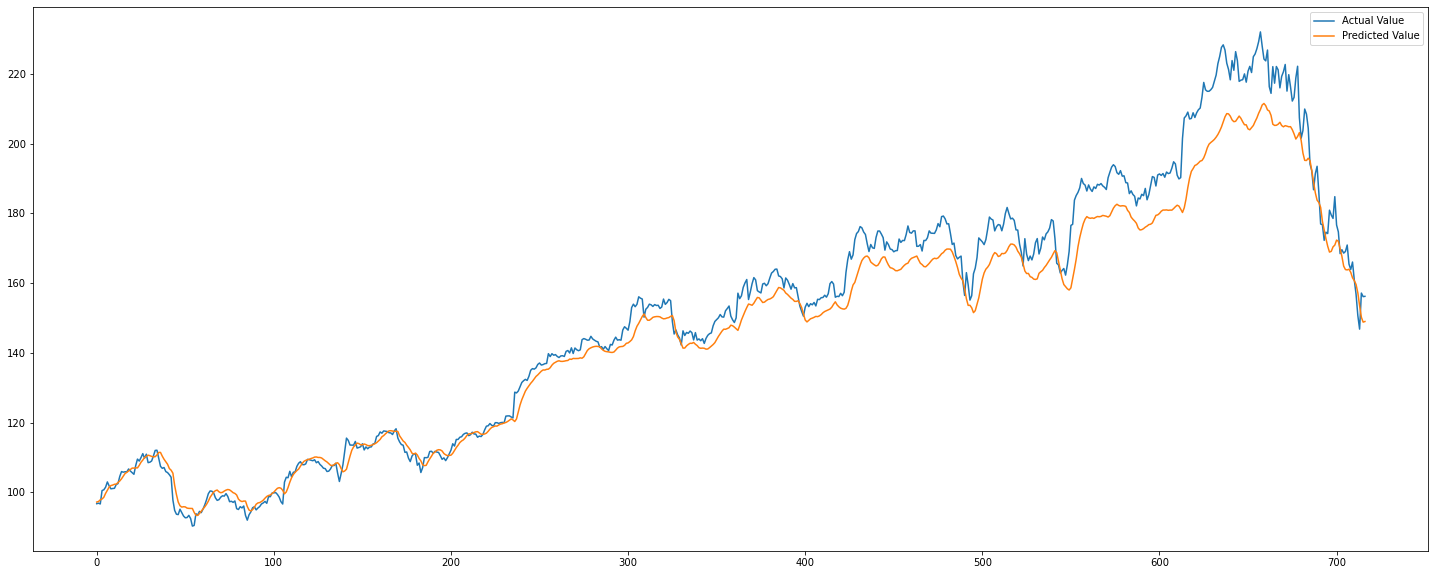

In [40]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_APPL)
plt.plot(testPredict_AAPL)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

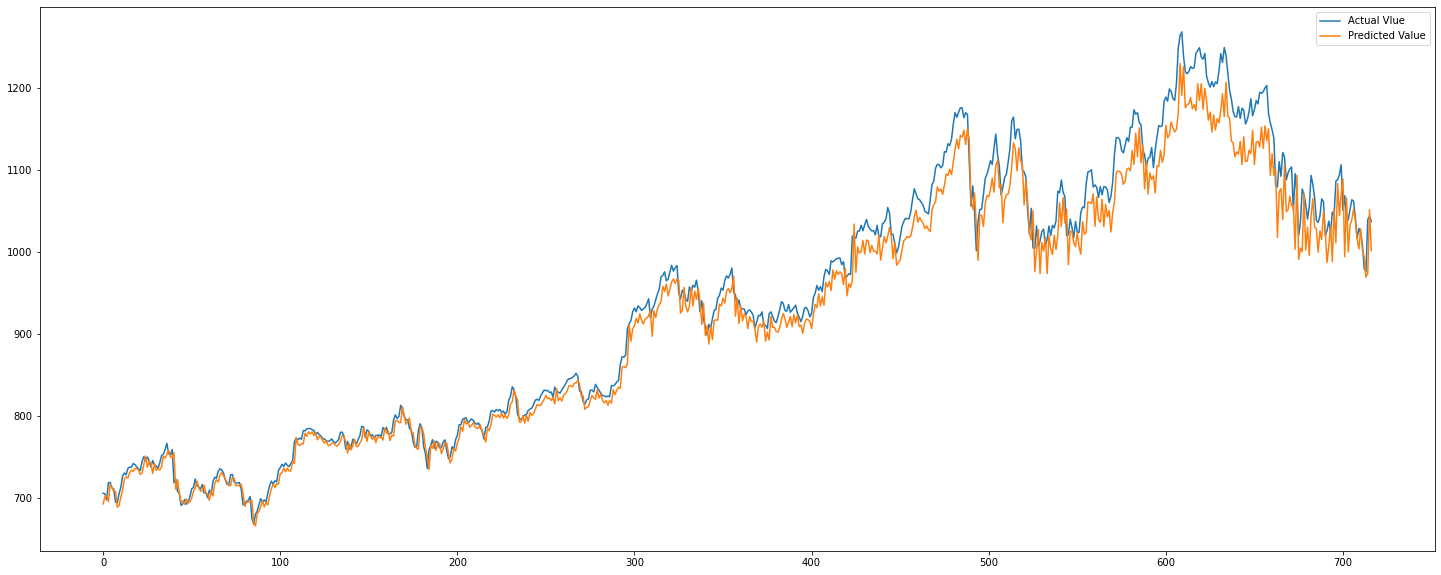

In [17]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_GOOG)
plt.plot(testPredict_GOOG)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Loss Function:

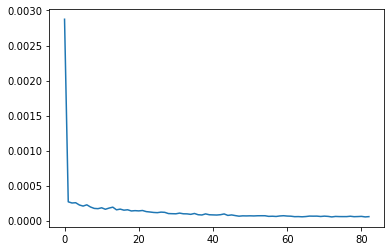

In [18]:
plt.plot(history_lstm.history['loss'])
plt.show()

GRU Model:

In [19]:
gru = Sequential()
gru.add(GRU(64, input_shape=(look_back, len(df.columns)), return_sequences=True))
gru.add(GRU(64))
gru.add(Dense(2))
gru.compile(loss='MSE', optimizer = keras.optimizers.Adam())
history_gru = gru.fit(trainX, trainY, epochs=4000, batch_size=16, verbose=2, callbacks = [callback])

Epoch 1/4000
93/93 - 6s - loss: 0.0019 - 6s/epoch - 64ms/step
Epoch 2/4000
93/93 - 2s - loss: 1.1389e-04 - 2s/epoch - 20ms/step
Epoch 3/4000
93/93 - 2s - loss: 1.0489e-04 - 2s/epoch - 26ms/step
Epoch 4/4000
93/93 - 2s - loss: 1.0011e-04 - 2s/epoch - 19ms/step
Epoch 5/4000
93/93 - 2s - loss: 1.0614e-04 - 2s/epoch - 26ms/step
Epoch 6/4000
93/93 - 2s - loss: 1.0442e-04 - 2s/epoch - 24ms/step
Epoch 7/4000
93/93 - 2s - loss: 9.1824e-05 - 2s/epoch - 22ms/step
Epoch 8/4000
93/93 - 3s - loss: 9.0131e-05 - 3s/epoch - 27ms/step
Epoch 9/4000
93/93 - 2s - loss: 8.2106e-05 - 2s/epoch - 25ms/step
Epoch 10/4000
93/93 - 3s - loss: 8.6917e-05 - 3s/epoch - 28ms/step
Epoch 11/4000
93/93 - 3s - loss: 8.0059e-05 - 3s/epoch - 30ms/step
Epoch 12/4000
93/93 - 2s - loss: 8.9268e-05 - 2s/epoch - 21ms/step
Epoch 13/4000
93/93 - 2s - loss: 7.7437e-05 - 2s/epoch - 19ms/step
Epoch 14/4000
93/93 - 2s - loss: 7.4287e-05 - 2s/epoch - 19ms/step
Epoch 15/4000
93/93 - 2s - loss: 7.0433e-05 - 2s/epoch - 19ms/step
Epoch 16

Predict by model:

In [20]:
testPredict = gru.predict(testX)
# invert predictions
testPredict = closescaler.inverse_transform(testPredict)

In [21]:
testPredict_AAPL, testPredict_GOOG = [], []

for i in range(len(testPredict)):
    testPredict_AAPL.append(testPredict[i,0])
    testPredict_GOOG.append(testPredict[i,1])



testPredict_AAPL = numpy.asanyarray(testPredict_AAPL)
testPredict_GOOG = numpy.asanyarray(testPredict_GOOG)


Results:

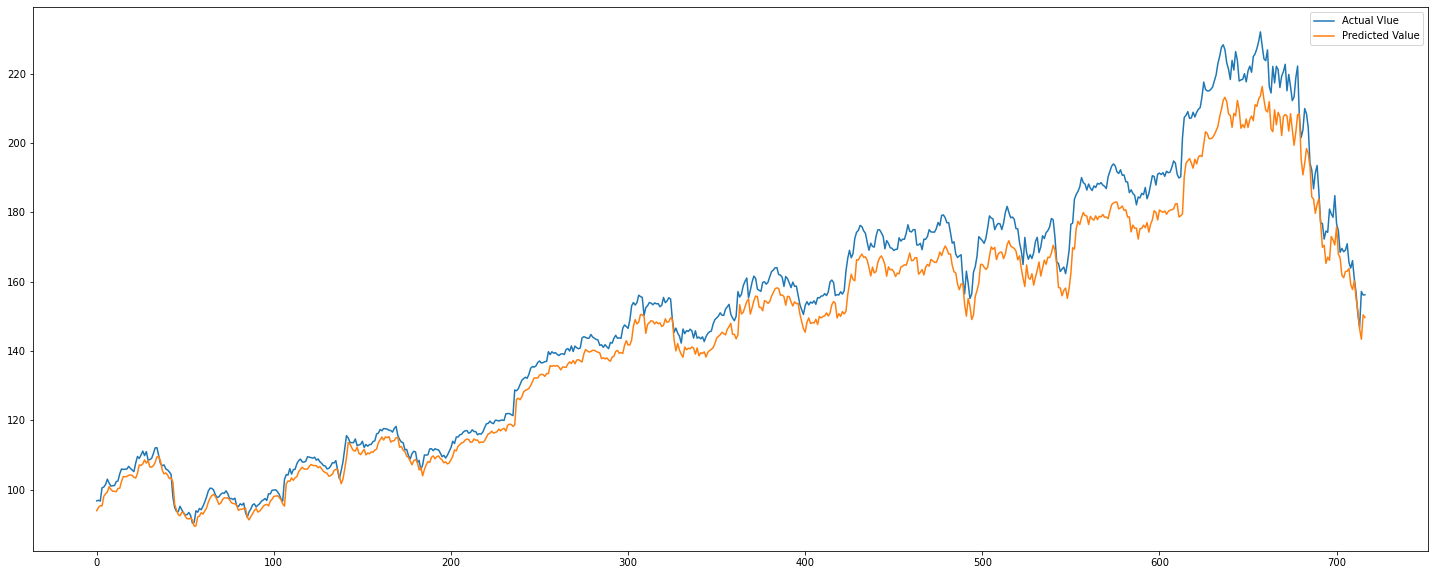

In [22]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_APPL)
plt.plot(testPredict_AAPL)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

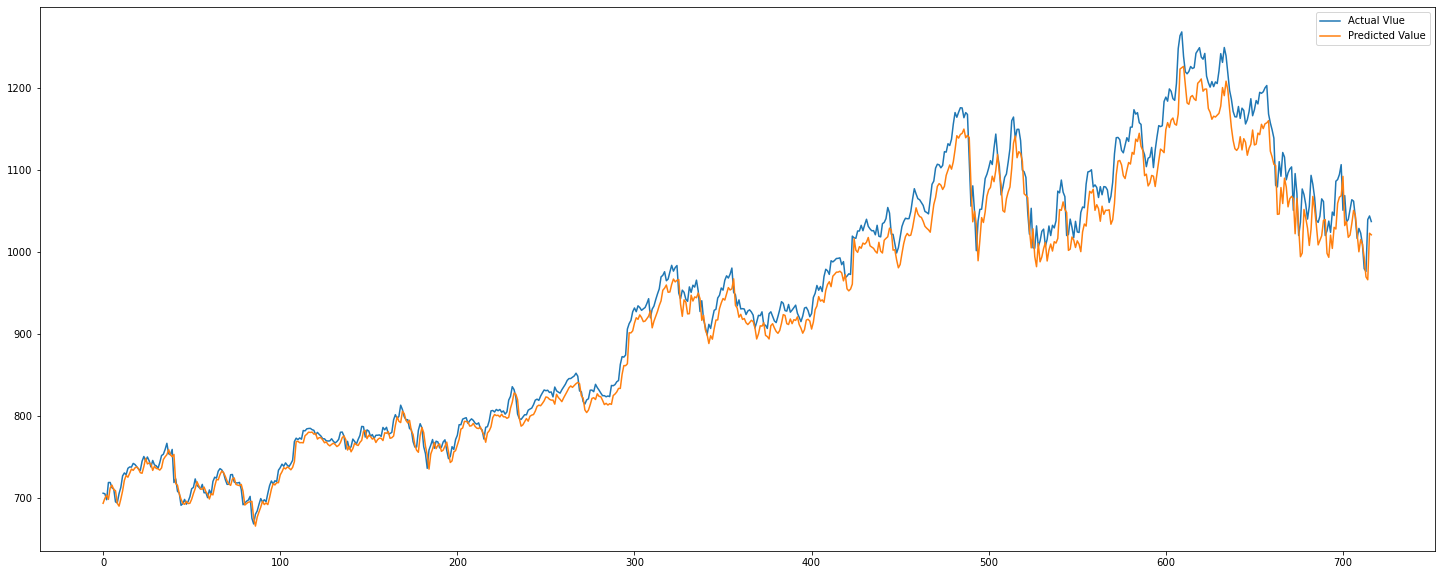

In [23]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_GOOG)
plt.plot(testPredict_GOOG)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Loss Function:

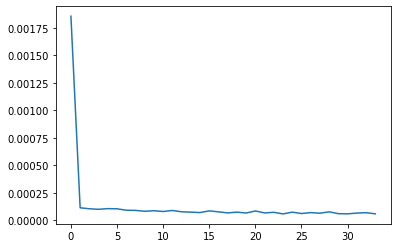

In [24]:
plt.plot(history_gru.history['loss'])
plt.show()

RNN Model:

In [25]:
rnn = Sequential()
rnn.add(SimpleRNN(64, input_shape=(look_back, len(df.columns)), return_sequences=True))
rnn.add(SimpleRNN(64))
rnn.add(Dense(2))
rnn.compile(loss='MSE', optimizer = keras.optimizers.Adam())
history_rnn = rnn.fit(trainX, trainY, epochs=4000, batch_size=16, verbose=2, callbacks = [callback])

Epoch 1/4000
93/93 - 2s - loss: 0.0119 - 2s/epoch - 18ms/step
Epoch 2/4000
93/93 - 1s - loss: 5.6676e-04 - 670ms/epoch - 7ms/step
Epoch 3/4000
93/93 - 1s - loss: 3.4691e-04 - 703ms/epoch - 8ms/step
Epoch 4/4000
93/93 - 1s - loss: 2.9963e-04 - 712ms/epoch - 8ms/step
Epoch 5/4000
93/93 - 1s - loss: 2.3363e-04 - 687ms/epoch - 7ms/step
Epoch 6/4000
93/93 - 1s - loss: 2.2593e-04 - 712ms/epoch - 8ms/step
Epoch 7/4000
93/93 - 1s - loss: 2.3714e-04 - 672ms/epoch - 7ms/step
Epoch 8/4000
93/93 - 1s - loss: 2.1080e-04 - 677ms/epoch - 7ms/step
Epoch 9/4000
93/93 - 1s - loss: 1.9399e-04 - 669ms/epoch - 7ms/step
Epoch 10/4000
93/93 - 1s - loss: 3.1384e-04 - 666ms/epoch - 7ms/step
Epoch 11/4000
93/93 - 1s - loss: 1.7369e-04 - 671ms/epoch - 7ms/step
Epoch 12/4000
93/93 - 1s - loss: 1.8087e-04 - 683ms/epoch - 7ms/step
Epoch 13/4000
93/93 - 1s - loss: 1.6943e-04 - 680ms/epoch - 7ms/step
Epoch 14/4000
93/93 - 1s - loss: 1.9665e-04 - 688ms/epoch - 7ms/step
Epoch 15/4000
93/93 - 1s - loss: 1.9593e-04 - 676

Predict by model:

In [26]:
testPredict = rnn.predict(testX)
# invert predictions
testPredict = closescaler.inverse_transform(testPredict)

In [27]:
testPredict_AAPL, testPredict_GOOG = [], []

for i in range(len(testPredict)):
    testPredict_AAPL.append(testPredict[i,0])
    testPredict_GOOG.append(testPredict[i,1])



testPredict_AAPL = numpy.asanyarray(testPredict_AAPL)
testPredict_GOOG = numpy.asanyarray(testPredict_GOOG)


Results:

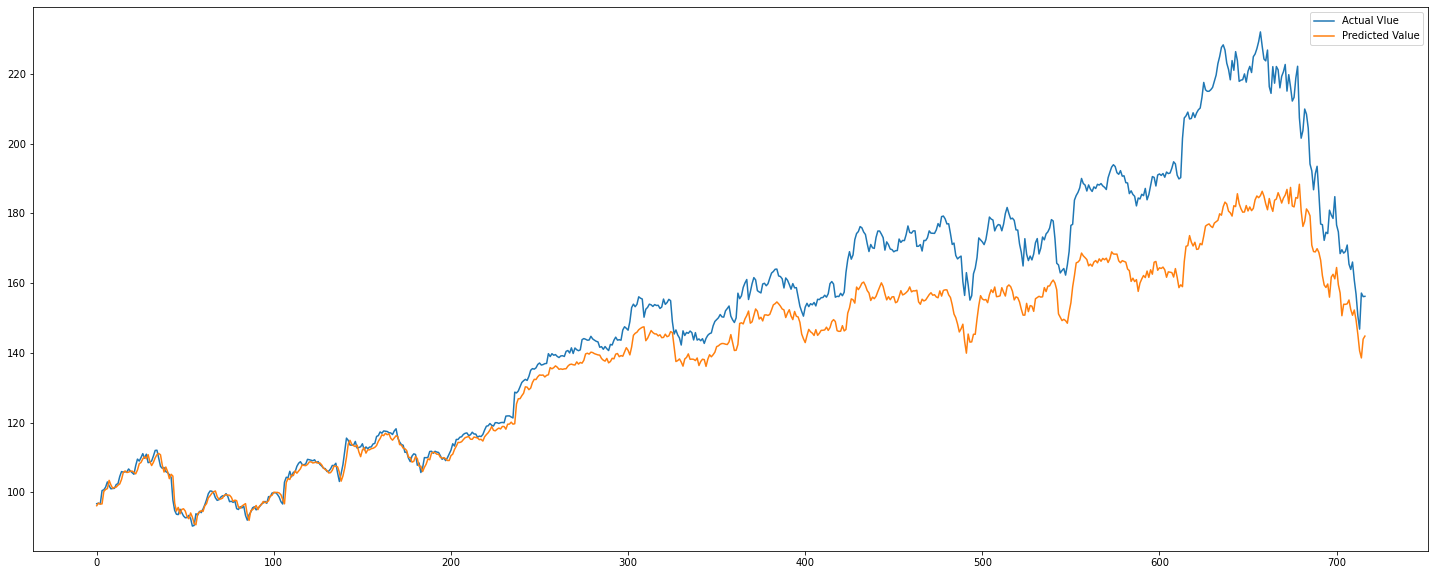

In [28]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_APPL)
plt.plot(testPredict_AAPL)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

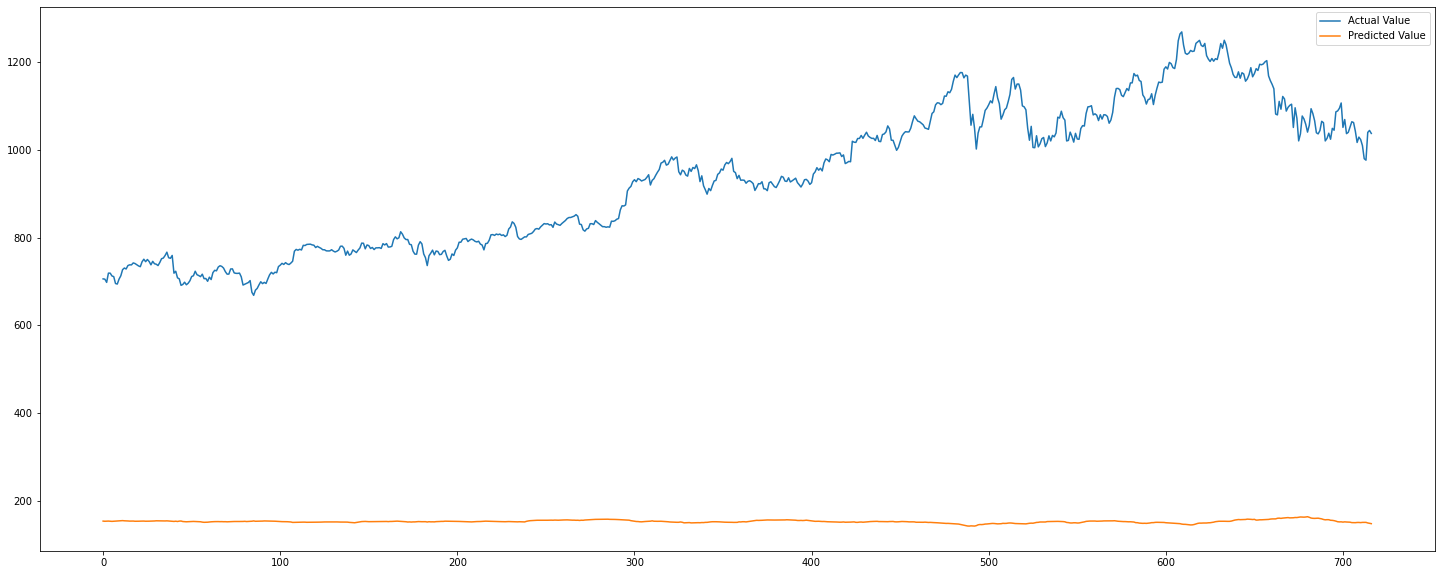

In [39]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_GOOG)
plt.plot(testPredict_GOOG)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Loss Function:

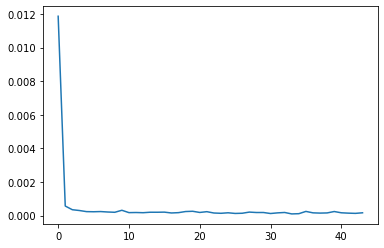

In [30]:
plt.plot(history_rnn.history['loss'])
plt.show()

Simple RNN cell has lower accuracy comparing with GRU and LSTM, but it's Faster than them. The difference betwwen training time of these architectures rises from their different number of 'gates', in other words number of trainable matrices.

GRU model is faster than LSTM and it has nearly same accuracy.

GRU Model:

In [31]:
gru_mape = Sequential()
gru_mape.add(GRU(64, input_shape=(look_back, len(df.columns)), return_sequences=True))
gru_mape.add(GRU(64))
gru_mape.add(Dense(2))
gru_mape.compile(loss='MAPE', optimizer = keras.optimizers.Adam())
history_gru_mape = gru_mape.fit(trainX, trainY, epochs=4000, batch_size=16, verbose=2, callbacks = [callback])

Epoch 1/4000
93/93 - 5s - loss: 23154.2383 - 5s/epoch - 49ms/step
Epoch 2/4000
93/93 - 2s - loss: 104562.6172 - 2s/epoch - 20ms/step
Epoch 3/4000
93/93 - 2s - loss: 32886.2656 - 2s/epoch - 20ms/step
Epoch 4/4000
93/93 - 2s - loss: 55897.9023 - 2s/epoch - 20ms/step
Epoch 5/4000
93/93 - 2s - loss: 15890.3721 - 2s/epoch - 19ms/step
Epoch 6/4000
93/93 - 2s - loss: 40851.5469 - 2s/epoch - 19ms/step
Epoch 7/4000
93/93 - 2s - loss: 21342.8867 - 2s/epoch - 25ms/step
Epoch 8/4000
93/93 - 2s - loss: 30658.7227 - 2s/epoch - 19ms/step
Epoch 9/4000
93/93 - 2s - loss: 15700.5195 - 2s/epoch - 18ms/step
Epoch 10/4000
93/93 - 2s - loss: 24746.8926 - 2s/epoch - 18ms/step
Epoch 11/4000
93/93 - 2s - loss: 11073.0996 - 2s/epoch - 22ms/step
Epoch 12/4000
93/93 - 2s - loss: 20674.4531 - 2s/epoch - 21ms/step
Epoch 13/4000
93/93 - 2s - loss: 10414.9160 - 2s/epoch - 19ms/step
Epoch 14/4000
93/93 - 2s - loss: 18417.1934 - 2s/epoch - 19ms/step
Epoch 15/4000
93/93 - 2s - loss: 10606.5010 - 2s/epoch - 19ms/step
Epo

Predict by model:

In [32]:
testPredict = gru_mape.predict(testX)
# invert predictions
testPredict = closescaler.inverse_transform(testPredict)

In [33]:
testPredict_AAPL, testPredict_GOOG = [], []

for i in range(len(testPredict)):
    testPredict_AAPL.append(testPredict[i,0])
    testPredict_GOOG.append(testPredict[i,1])



testPredict_AAPL = numpy.asanyarray(testPredict_AAPL)
testPredict_GOOG = numpy.asanyarray(testPredict_GOOG)


Results:

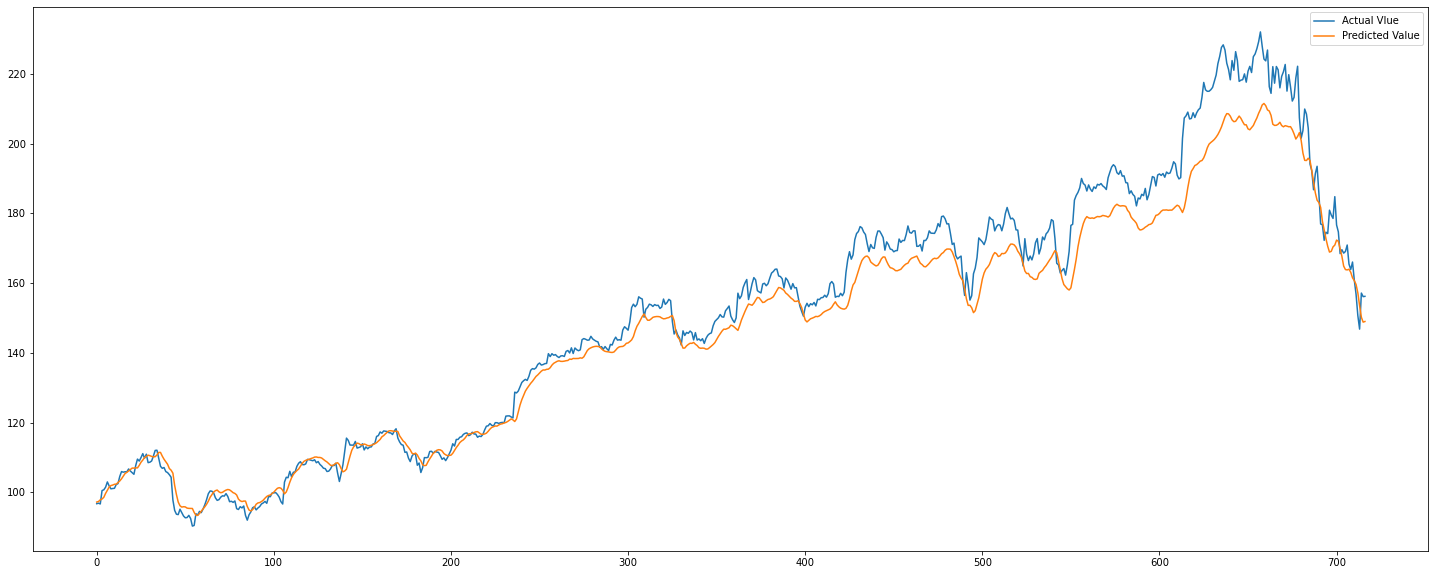

In [35]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_APPL)
plt.plot(testPredict_AAPL)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

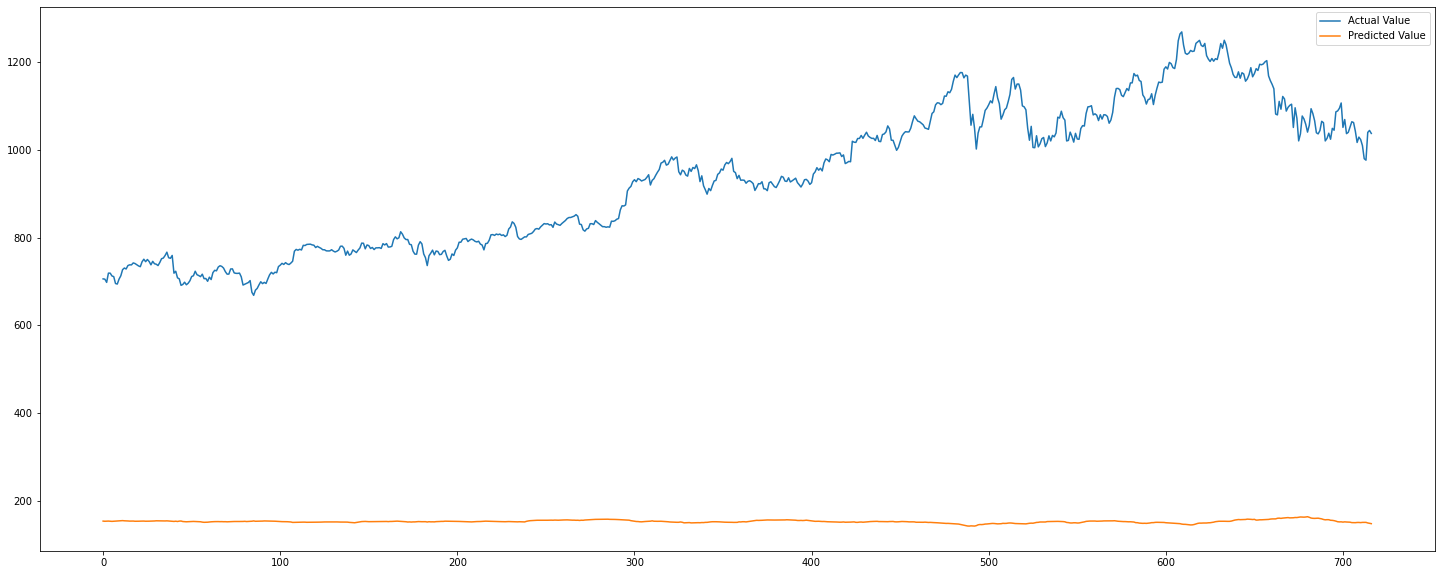

In [38]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_GOOG)
plt.plot(testPredict_GOOG)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Loss Function:

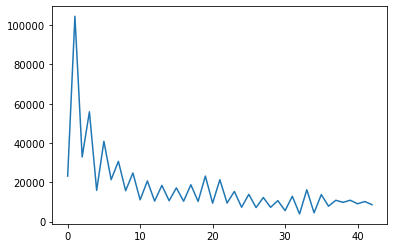

In [37]:
plt.plot(history_gru_mape.history['loss'])
plt.show()

Model with MSE loss function has more accuracy in compare with model with MAPE loss function.

LSTM model with ADAgrad optimizer:

In [43]:
lstm_adagrad = Sequential()
lstm_adagrad.add(LSTM(64, input_shape=(look_back, len(df.columns)), return_sequences=True))
lstm_adagrad.add(LSTM(64))
lstm_adagrad.add(Dense(2))
lstm_adagrad.compile(loss='MSE', optimizer = keras.optimizers.Adagrad())
history_lstm_adagrad = lstm_adagrad.fit(trainX, trainY, epochs=400, batch_size=16, verbose=2, callbacks = [callback])

Epoch 1/400
93/93 - 7s - loss: 0.0376 - 7s/epoch - 77ms/step
Epoch 2/400
93/93 - 2s - loss: 0.0121 - 2s/epoch - 19ms/step
Epoch 3/400
93/93 - 2s - loss: 0.0086 - 2s/epoch - 19ms/step
Epoch 4/400
93/93 - 3s - loss: 0.0073 - 3s/epoch - 27ms/step
Epoch 5/400
93/93 - 2s - loss: 0.0064 - 2s/epoch - 24ms/step
Epoch 6/400
93/93 - 2s - loss: 0.0057 - 2s/epoch - 23ms/step
Epoch 7/400
93/93 - 2s - loss: 0.0051 - 2s/epoch - 26ms/step
Epoch 8/400
93/93 - 3s - loss: 0.0046 - 3s/epoch - 32ms/step
Epoch 9/400
93/93 - 2s - loss: 0.0042 - 2s/epoch - 24ms/step
Epoch 10/400
93/93 - 2s - loss: 0.0038 - 2s/epoch - 21ms/step
Epoch 11/400
93/93 - 3s - loss: 0.0035 - 3s/epoch - 29ms/step
Epoch 12/400
93/93 - 4s - loss: 0.0033 - 4s/epoch - 47ms/step
Epoch 13/400
93/93 - 3s - loss: 0.0031 - 3s/epoch - 31ms/step
Epoch 14/400
93/93 - 2s - loss: 0.0029 - 2s/epoch - 21ms/step
Epoch 15/400
93/93 - 2s - loss: 0.0028 - 2s/epoch - 22ms/step
Epoch 16/400
93/93 - 2s - loss: 0.0027 - 2s/epoch - 20ms/step
Epoch 17/400
93/9

Predict by model:

In [44]:
testPredict = lstm_adagrad.predict(testX)
# invert predictions
testPredict = closescaler.inverse_transform(testPredict)
recovered_testY = closescaler.inverse_transform(testY)

In [45]:
testPredict_AAPL, testPredict_GOOG, recovered_testY_APPL, recovered_testY_GOOG = [], [], [], []

for i in range(len(testPredict)):
    testPredict_AAPL.append(testPredict[i,0])
    testPredict_GOOG.append(testPredict[i,1])

    recovered_testY_APPL.append(recovered_testY[i,0])
    recovered_testY_GOOG.append(recovered_testY[i,1])


testPredict_AAPL = numpy.asanyarray(testPredict_AAPL)
testPredict_GOOG = numpy.asanyarray(testPredict_GOOG)
recovered_testY_APPL = numpy.asarray(recovered_testY_APPL)
recovered_testY_GOOG = numpy.asarray(recovered_testY_GOOG)


Results:

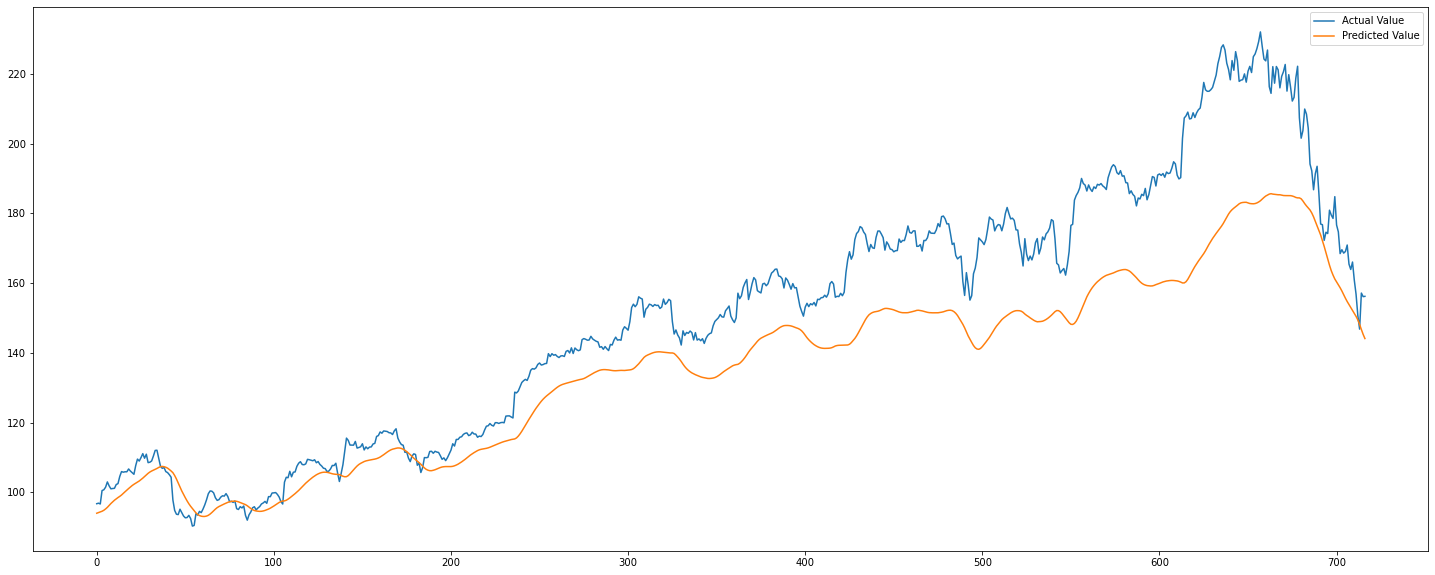

In [46]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_APPL)
plt.plot(testPredict_AAPL)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

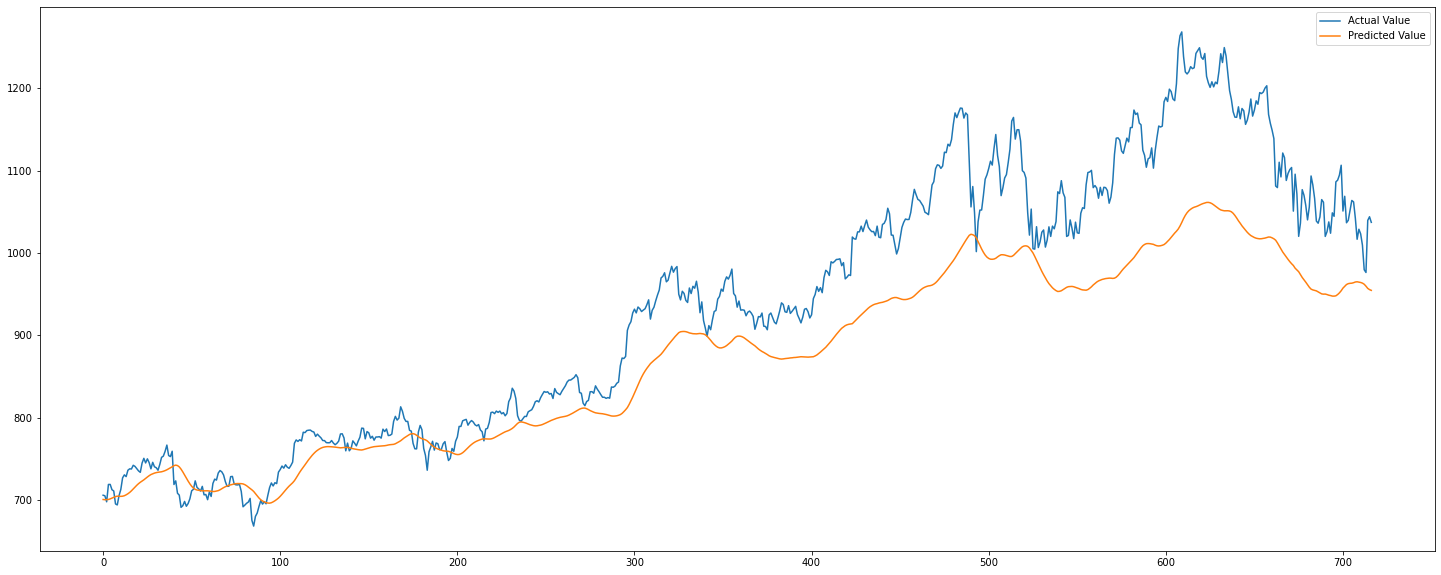

In [47]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_GOOG)
plt.plot(testPredict_GOOG)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Loss Function:

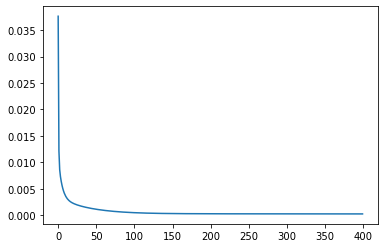

In [56]:
plt.plot(history_lstm_adagrad.history['loss'])
plt.show()

LSTM model with RMSprop optimizer:

In [50]:
lstm_rmsprop = Sequential()
lstm_rmsprop.add(LSTM(64, input_shape=(look_back, len(df.columns)), return_sequences=True))
lstm_rmsprop.add(LSTM(64))
lstm_rmsprop.add(Dense(2))
lstm_rmsprop.compile(loss='MSE', optimizer = keras.optimizers.RMSprop())
history_lstm_rmsprop = lstm_rmsprop.fit(trainX, trainY, epochs=400, batch_size=16, verbose=2, callbacks = [callback])

Epoch 1/400
93/93 - 8s - loss: 0.0025 - 8s/epoch - 86ms/step
Epoch 2/400
93/93 - 2s - loss: 7.8590e-04 - 2s/epoch - 26ms/step
Epoch 3/400
93/93 - 3s - loss: 5.9047e-04 - 3s/epoch - 30ms/step
Epoch 4/400
93/93 - 3s - loss: 4.8658e-04 - 3s/epoch - 29ms/step
Epoch 5/400
93/93 - 3s - loss: 4.0030e-04 - 3s/epoch - 29ms/step
Epoch 6/400
93/93 - 2s - loss: 3.5255e-04 - 2s/epoch - 26ms/step
Epoch 7/400
93/93 - 2s - loss: 3.1663e-04 - 2s/epoch - 26ms/step
Epoch 8/400
93/93 - 2s - loss: 2.9676e-04 - 2s/epoch - 23ms/step
Epoch 9/400
93/93 - 2s - loss: 2.8328e-04 - 2s/epoch - 21ms/step
Epoch 10/400
93/93 - 2s - loss: 2.3650e-04 - 2s/epoch - 23ms/step
Epoch 11/400
93/93 - 2s - loss: 2.4058e-04 - 2s/epoch - 25ms/step
Epoch 12/400
93/93 - 2s - loss: 2.1042e-04 - 2s/epoch - 22ms/step
Epoch 13/400
93/93 - 2s - loss: 2.2558e-04 - 2s/epoch - 21ms/step
Epoch 14/400
93/93 - 2s - loss: 1.9487e-04 - 2s/epoch - 21ms/step
Epoch 15/400
93/93 - 2s - loss: 1.8010e-04 - 2s/epoch - 21ms/step
Epoch 16/400
93/93 - 2s

Predict by model:

In [51]:
testPredict = lstm_rmsprop.predict(testX)
# invert predictions
testPredict = closescaler.inverse_transform(testPredict)
recovered_testY = closescaler.inverse_transform(testY)

In [52]:
testPredict_AAPL, testPredict_GOOG, recovered_testY_APPL, recovered_testY_GOOG = [], [], [], []

for i in range(len(testPredict)):
    testPredict_AAPL.append(testPredict[i,0])
    testPredict_GOOG.append(testPredict[i,1])

    recovered_testY_APPL.append(recovered_testY[i,0])
    recovered_testY_GOOG.append(recovered_testY[i,1])


testPredict_AAPL = numpy.asanyarray(testPredict_AAPL)
testPredict_GOOG = numpy.asanyarray(testPredict_GOOG)
recovered_testY_APPL = numpy.asarray(recovered_testY_APPL)
recovered_testY_GOOG = numpy.asarray(recovered_testY_GOOG)


Results:

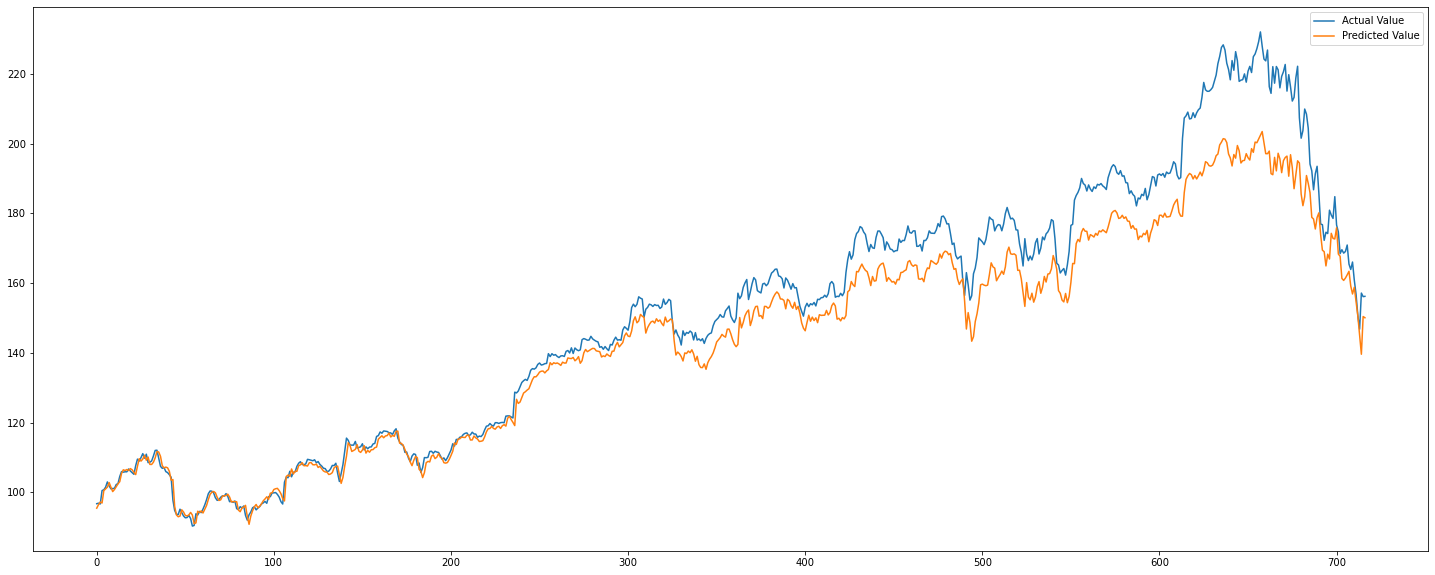

In [53]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_APPL)
plt.plot(testPredict_AAPL)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

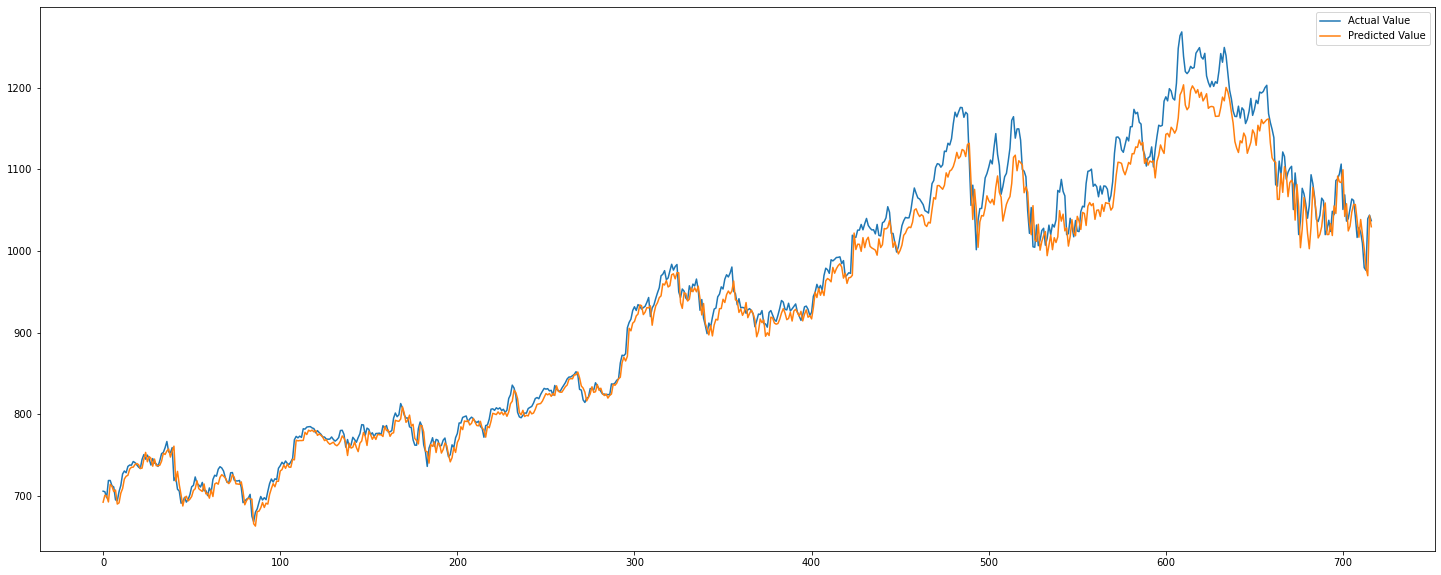

In [54]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_GOOG)
plt.plot(testPredict_GOOG)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Loss Function:

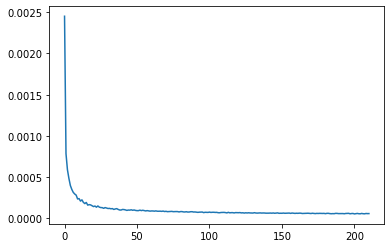

In [55]:
plt.plot(history_lstm_rmsprop.history['loss'])
plt.show()

Adam is best optimizer and produces best results. Convergence speed of Adagrad is low and it reduces loss value with low speed. RMSprop converges to expected result but it's convergence speed is so low in compare with Adam.

Define LSTM model with dropout:

In [65]:
lstm_dropout = Sequential()
lstm_dropout.add(LSTM(64, input_shape=(look_back, len(df.columns)), return_sequences=True, recurrent_dropout=0.2))
lstm_dropout.add(LSTM(64))
lstm_dropout.add(Dense(2))
lstm_dropout.compile(loss='MSE', optimizer = keras.optimizers.Adam())
history_lstm_dropout = lstm_dropout.fit(trainX, trainY, epochs=4000, batch_size=16, verbose=2, callbacks = [callback])

Epoch 1/4000
93/93 - 8s - loss: 0.0032 - 8s/epoch - 88ms/step
Epoch 2/4000
93/93 - 3s - loss: 2.7111e-04 - 3s/epoch - 35ms/step
Epoch 3/4000
93/93 - 3s - loss: 2.5227e-04 - 3s/epoch - 34ms/step
Epoch 4/4000
93/93 - 3s - loss: 2.3903e-04 - 3s/epoch - 35ms/step
Epoch 5/4000
93/93 - 3s - loss: 2.1441e-04 - 3s/epoch - 34ms/step
Epoch 6/4000
93/93 - 3s - loss: 2.1752e-04 - 3s/epoch - 35ms/step
Epoch 7/4000
93/93 - 3s - loss: 2.0326e-04 - 3s/epoch - 32ms/step
Epoch 8/4000
93/93 - 3s - loss: 1.9642e-04 - 3s/epoch - 31ms/step
Epoch 9/4000
93/93 - 3s - loss: 2.0713e-04 - 3s/epoch - 30ms/step
Epoch 10/4000
93/93 - 3s - loss: 1.8815e-04 - 3s/epoch - 30ms/step
Epoch 11/4000
93/93 - 3s - loss: 1.8748e-04 - 3s/epoch - 29ms/step
Epoch 12/4000
93/93 - 3s - loss: 1.9664e-04 - 3s/epoch - 29ms/step
Epoch 13/4000
93/93 - 3s - loss: 1.5088e-04 - 3s/epoch - 30ms/step
Epoch 14/4000
93/93 - 3s - loss: 1.9584e-04 - 3s/epoch - 30ms/step
Epoch 15/4000
93/93 - 3s - loss: 1.6433e-04 - 3s/epoch - 29ms/step
Epoch 16

Predict by model:

In [66]:
testPredict = lstm_dropout.predict(testX)
# invert predictions
testPredict = closescaler.inverse_transform(testPredict)
recovered_testY = closescaler.inverse_transform(testY)

In [67]:
testPredict_AAPL, testPredict_GOOG, recovered_testY_APPL, recovered_testY_GOOG = [], [], [], []

for i in range(len(testPredict)):
    testPredict_AAPL.append(testPredict[i,0])
    testPredict_GOOG.append(testPredict[i,1])

    recovered_testY_APPL.append(recovered_testY[i,0])
    recovered_testY_GOOG.append(recovered_testY[i,1])


testPredict_AAPL = numpy.asanyarray(testPredict_AAPL)
testPredict_GOOG = numpy.asanyarray(testPredict_GOOG)
recovered_testY_APPL = numpy.asarray(recovered_testY_APPL)
recovered_testY_GOOG = numpy.asarray(recovered_testY_GOOG)


Results:

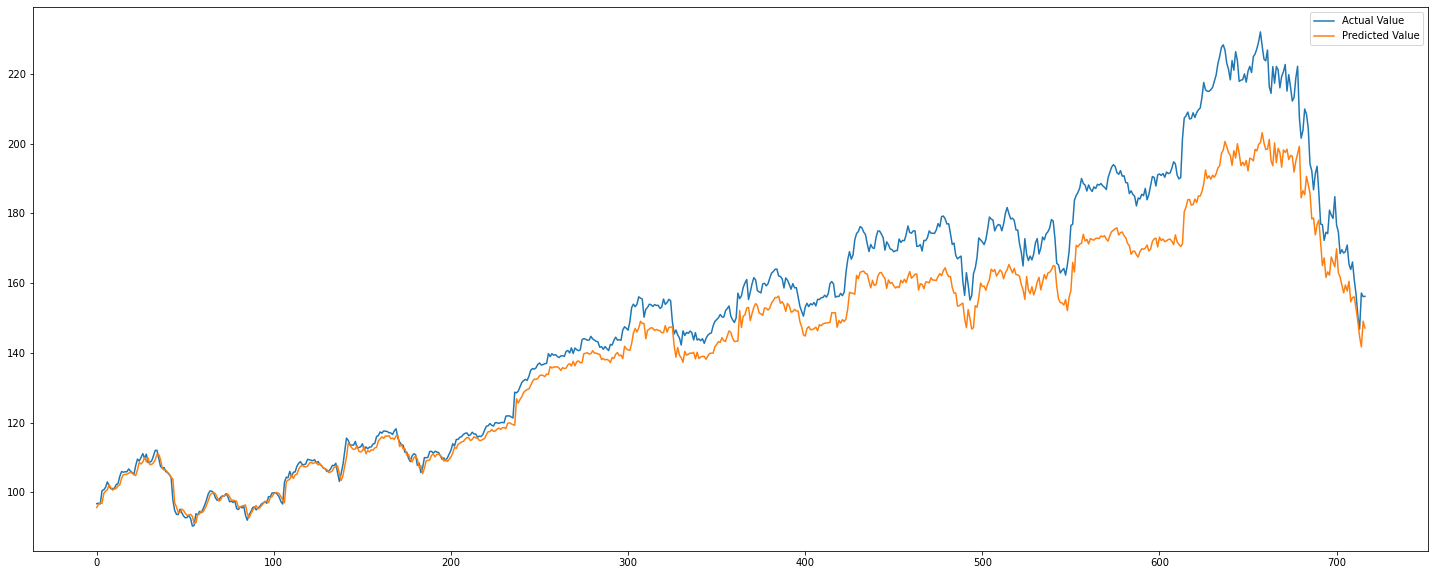

In [68]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_APPL)
plt.plot(testPredict_AAPL)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

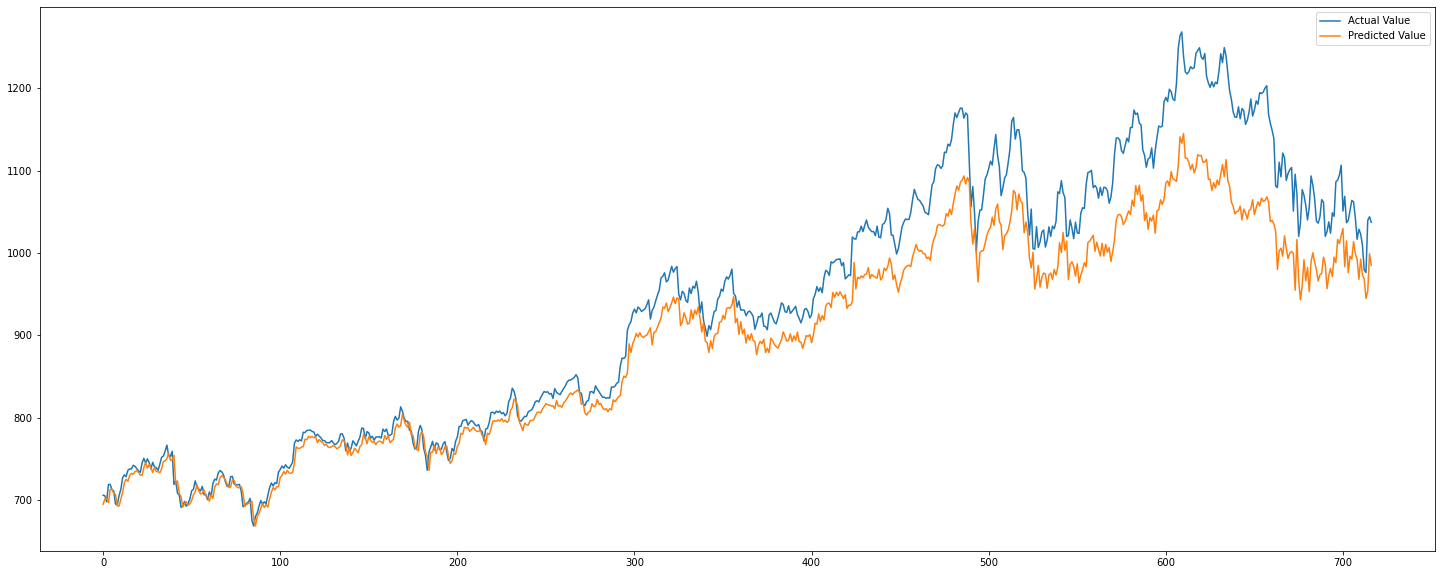

In [69]:
plt.figure(figsize=[25,10])
plt.plot(recovered_testY_GOOG)
plt.plot(testPredict_GOOG)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Loss Function:

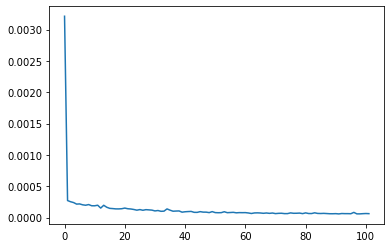

In [70]:
plt.plot(history_lstm_dropout.history['loss'])
plt.show()

Using normal dropout increased model loss and recurrent dropout has not significant effect on model performance.